## Treinamento de Idade do Gênero Feminino

Neste notebook treinar nossa rede para resolver o problema de classificação de idade considerando apenas o gênero feminino. Para isso iremos utilizar o framework [Keras](https://keras.io)

## Dependências

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import _pickle as pkl
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.layers import normalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

Using TensorFlow backend.


## Funções auxíliares

Iremos carregar implementar algumas funções para leitura e formatação dos dados de entrada pré processados no notebook anterior.

In [5]:
DATA_NAME = ['data_%d' % i for i in range(5)]

In [6]:
def load(name):
    with open(name+'.pkl', 'rb') as f:
        return pkl.load(f)

def wrapper_data(name):
    imagens = []
    labels = []
    for data in DATA_NAME:
        obj = load(name+data)
        for x, y in zip(obj['imagens'], obj['labels']):
            imagens.append(x)
            labels.append(y)
    return np.array(imagens, dtype=np.float16),  np.array(labels, dtype=np.uint16) 

## Arquitetura

![arch](images/test1.png)

### Modelo

In [7]:
model = Sequential()

model.add(Conv2D(filters=64,
                 kernel_size=(5,5),
                 padding='same',
                 strides=(4,4),
                 input_shape=(227,227,3)))
model.add(BatchNormalization(axis=3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

model.add(Conv2D(filters=128,
                 kernel_size=(5,5),
                 padding='same'))
model.add(BatchNormalization(axis=3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

model.add(Conv2D(filters=256,
                 kernel_size=(3,3),
                 padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2),  padding='same'))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(8, activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 57, 57, 64)        4864      
_________________________________________________________________
batch_normalization_1 (Batch (None, 57, 57, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 57, 57, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 128)       204928    
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 29, 128)       512       
_________________________________________________________________
activation_2 (Activation)    (None, 29, 29, 128)       0         
__________

### Hiper-parâmetros

In [8]:
BATCH_SIZE = 64
EPOCHS = 100

In [9]:
model.compile(loss=categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

### Entrada 

In [10]:
# carrega dados
X, y = wrapper_data('serializer/age-female/')
# separa dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

y_oh_train = to_categorical(y_train, 8)
y_oh_test = to_categorical(y_test, 8)

X_train.shape, X_test.shape, y_oh_train.shape, y_oh_test.shape

((7146, 227, 227, 3), (1262, 227, 227, 3), (7146, 8), (1262, 8))

### Treino

In [11]:
hist = model.fit(x=X_train, y=y_oh_train, validation_split=0.1, batch_size=BATCH_SIZE, epochs=EPOCHS)
model.save('models/model_age_female.h5')

print('Train loss:', model.evaluate(X_train, y_oh_train, verbose=0))
print('Test loss:', model.evaluate(X_test, y_oh_test, verbose=0))

Train on 6431 samples, validate on 715 samples
Epoch 1/100
6431/6431 [==============================] - 137s 21ms/step - loss: 1.9650 - acc: 0.3138 - val_loss: 1.8228 - val_acc: 0.3245
Epoch 2/100
6431/6431 [==============================] - 130s 20ms/step - loss: 1.7599 - acc: 0.3671 - val_loss: 1.7036 - val_acc: 0.3818
Epoch 3/100
6431/6431 [==============================] - 131s 20ms/step - loss: 1.6433 - acc: 0.3981 - val_loss: 1.5236 - val_acc: 0.4210
Epoch 4/100
6431/6431 [==============================] - 127s 20ms/step - loss: 1.5364 - acc: 0.4234 - val_loss: 1.4622 - val_acc: 0.4448
Epoch 5/100
6431/6431 [==============================] - 131s 20ms/step - loss: 1.4716 - acc: 0.4513 - val_loss: 1.3885 - val_acc: 0.4713
Epoch 6/100
6431/6431 [==============================] - 118s 18ms/step - loss: 1.4051 - acc: 0.4640 - val_loss: 1.3628 - val_acc: 0.4769
Epoch 7/100
6431/6431 [==============================] - 122s 19ms/step - loss: 1.3318 - acc: 0.4925 - val_loss: 1.3073 - val

6431/6431 [==============================] - 149s 23ms/step - loss: 0.1800 - acc: 0.9372 - val_loss: 2.0756 - val_acc: 0.6070
Epoch 60/100
6431/6431 [==============================] - 145s 23ms/step - loss: 0.1851 - acc: 0.9367 - val_loss: 2.0536 - val_acc: 0.5804
Epoch 61/100
6431/6431 [==============================] - 140s 22ms/step - loss: 0.1806 - acc: 0.9344 - val_loss: 2.2147 - val_acc: 0.6140
Epoch 62/100
6431/6431 [==============================] - 140s 22ms/step - loss: 0.1984 - acc: 0.9328 - val_loss: 2.0928 - val_acc: 0.6140
Epoch 63/100
6431/6431 [==============================] - 140s 22ms/step - loss: 0.1593 - acc: 0.9412 - val_loss: 2.1576 - val_acc: 0.6308
Epoch 64/100
6431/6431 [==============================] - 140s 22ms/step - loss: 0.1661 - acc: 0.9445 - val_loss: 2.2547 - val_acc: 0.6126
Epoch 65/100
6431/6431 [==============================] - 134s 21ms/step - loss: 0.1619 - acc: 0.9446 - val_loss: 2.3775 - val_acc: 0.6140
Epoch 66/100
6431/6431 [================

In [12]:
y_pred = model.predict(X_test).argmax(axis=1)
print('Acurácia:', accuracy_score(y_test, y_pred))
print('Matriz de de confusão:\n', confusion_matrix(y_test, y_pred))

Acurácia: 0.6481774960380349
Matriz de de confusão:
 [[ 69  27   3   3   0   1   1   0]
 [ 23 130  16   1   7   1   0   0]
 [  2   4 138   4  23   3   0   2]
 [  0   1   7  70  48   7   4   1]
 [  1   6  20  21 316  20   3   1]
 [  0   2   7   6  75  57   3   6]
 [  1   2   0   2  18   6  16   4]
 [  0   1   8   6  13  18   5  22]]


Text(0.5,0,'epoch')

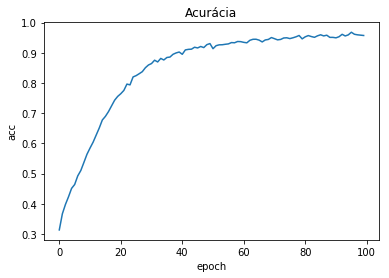

In [13]:
plt.plot(hist.history['acc'])
plt.title('Acurácia')
plt.ylabel('acc')
plt.xlabel('epoch')

Text(0.5,0,'epoch')

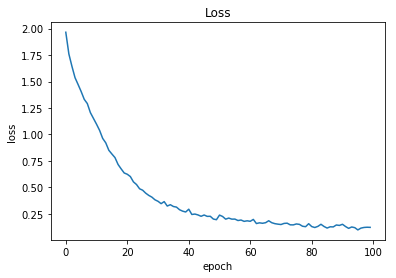

In [14]:
plt.plot(hist.history['loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')